In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [2]:
train_dir = "C://Users/User/Desktop/ASL/asl_alphabet_train"
eval_dir = "C://Users/User/Desktop/ASL/asl_alphabet_test"

In [3]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [4]:
def load_eval_images(directory):
    images = []
    labels = []
    #labels_idx = []
    for idx,label in enumerate(eval_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            #print(filepath)
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(os.path.basename(filepath))
            #labels_idx.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    #labels_idx = np.array(labels_idx)
    #return(images, labels, labels_idx)
    return(images, labels)

In [5]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

eval_labels = sorted(os.listdir(eval_dir))
X_eval, y_eval = load_eval_images(directory = eval_dir)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  29
Number of training images:  78300
Number of testing images:  8700
Number of evaluation images:  29


In [7]:
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

In [8]:
def print_eval_images(image_list, label_list):
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))
    for i in range(len(image_list)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[i])
        plt.title(label_list[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


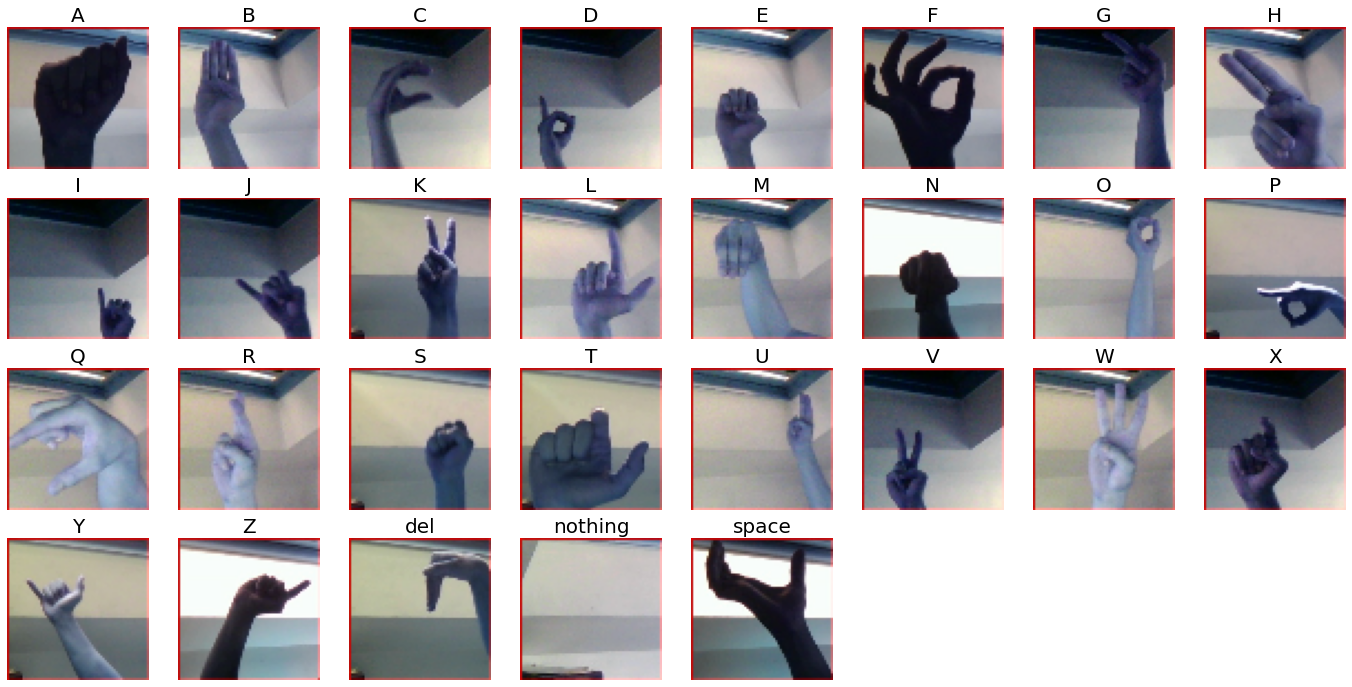

In [9]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


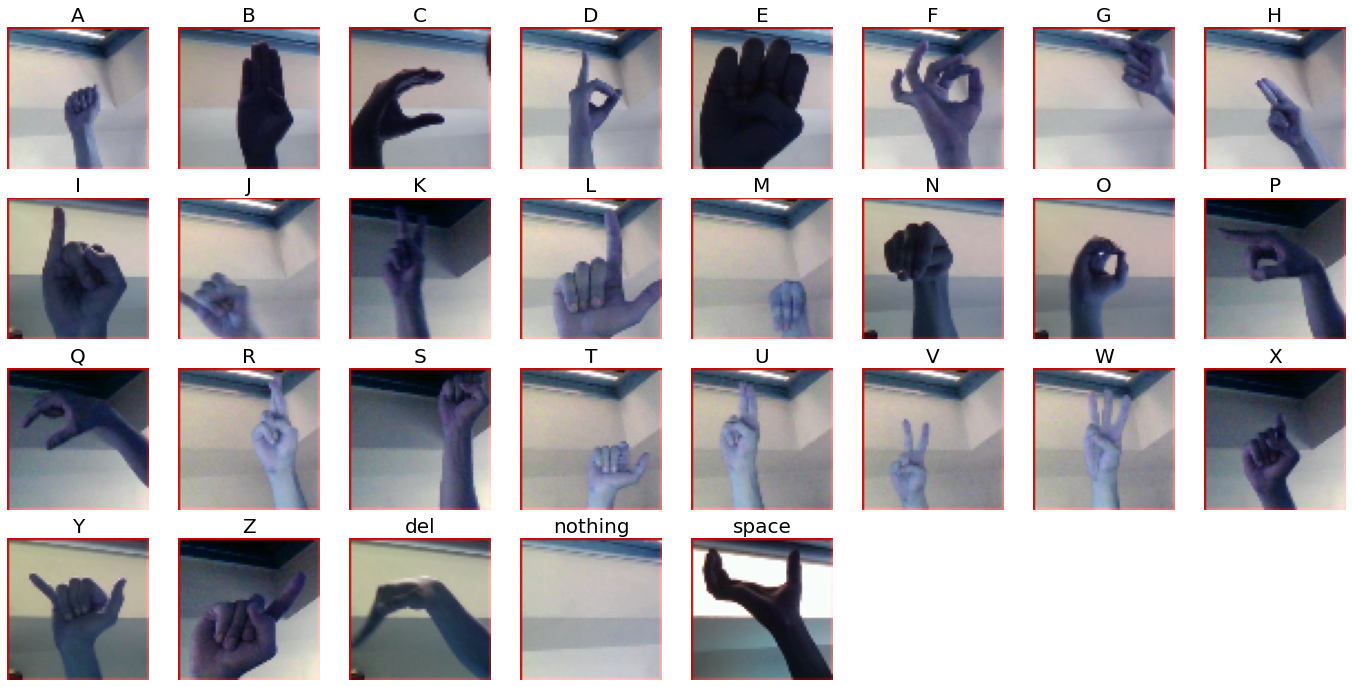

In [10]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

Evaluation images: 


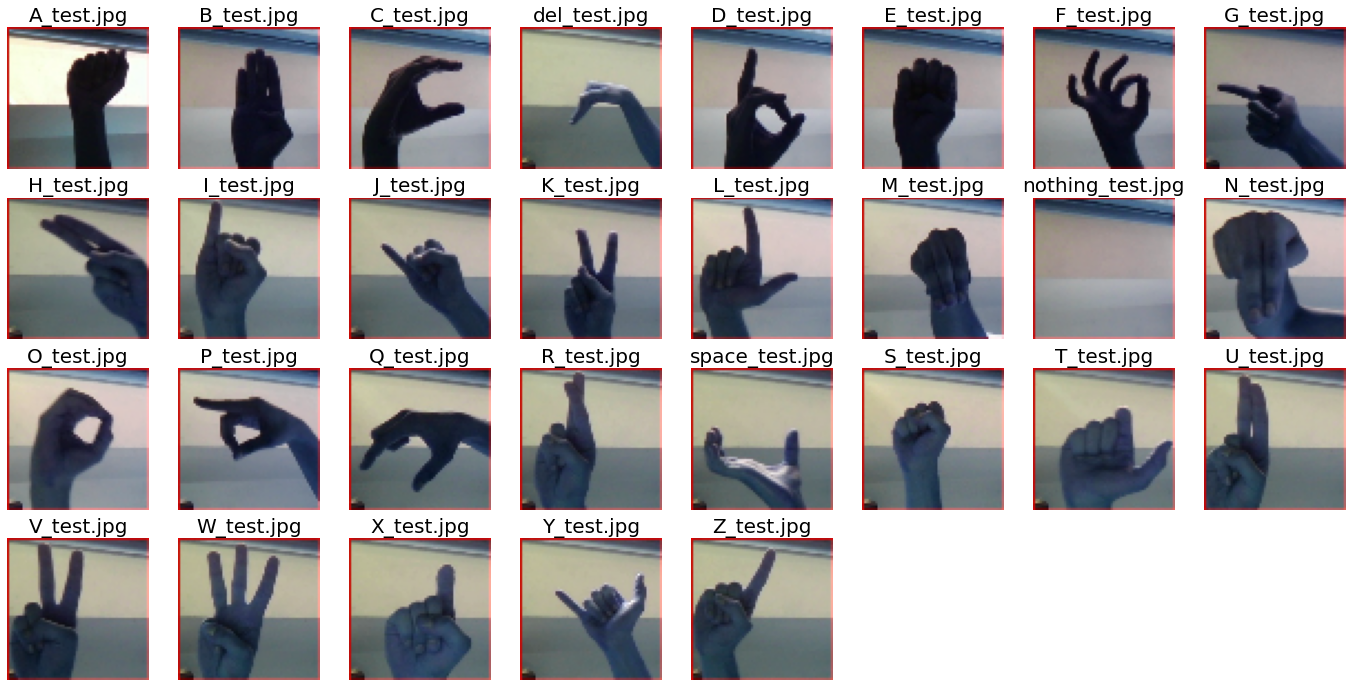

In [11]:
print("Evaluation images: ")
print_eval_images(X_eval, y_eval)

In [12]:
def eval_ohe(y_eval):
    switcher = {
        'A_test.jpg': 0,
        'B_test.jpg': 1,
        'C_test.jpg': 2,
        'del_test.jpg': 3,
        'D_test.jpg': 4,
        'E_test.jpg': 5,
        'F_test.jpg': 6,
        'G_test.jpg': 7,
        'H_test.jpg': 8,
        'I_test.jpg': 9,
        'J_test.jpg': 10,
        'K_test.jpg': 11,
        'L_test.jpg': 12,
        'M_test.jpg': 13,
        'nothing_test.jpg': 14,
        'N_test.jpg': 15,
        'O_test.jpg': 16,
        'P_test.jpg': 17,
        'Q_test.jpg': 18,
        'R_test.jpg': 19,
        'space_test.jpg': 20,
        'S_test.jpg': 21, 
        'T_test.jpg': 22,
        'U_test.jpg': 23,
        'V_test.jpg': 24,
        'W_test.jpg': 25,
        'X_test.jpg': 26,
        'Y_test.jpg': 27,
        'Z_test.jpg': 28,
    }
    return switcher.get(y_eval, "nothing")

In [13]:
y_eval_ohe = []
for i in range(len(y_eval)):
    y_eval_ohe.append(eval_ohe(y_eval[i]))

In [14]:
y_eval_ohe = keras.utils.to_categorical(y_eval_ohe)

In [15]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
#y_eval = keras.utils.to_categorical(y_eval)

In [16]:
print(y_train[0])
print(len(y_train[0]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
29


In [17]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [18]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
                 input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [19]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
hist = model.fit(X_train, y_train, epochs = 7, batch_size = 64)

Epoch 1/7
1224/1224 [==============================] - 47s 34ms/step - loss: 1.4975 - accuracy: 0.5511
Epoch 2/7
1224/1224 [==============================] - 41s 33ms/step - loss: 0.2099 - accuracy: 0.9334
Epoch 3/7
1224/1224 [==============================] - 41s 33ms/step - loss: 0.1269 - accuracy: 0.9627
Epoch 4/7
1224/1224 [==============================] - 41s 33ms/step - loss: 0.1069 - accuracy: 0.9707
Epoch 5/7
1224/1224 [==============================] - 41s 33ms/step - loss: 0.1012 - accuracy: 0.9749
Epoch 6/7
1224/1224 [==============================] - 41s 33ms/step - loss: 0.1089 - accuracy: 0.9749
Epoch 7/7
1224/1224 [==============================] - 41s 33ms/step - loss: 0.1053 - accuracy: 0.9775


In [21]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for test images: 99.828 %


In [22]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

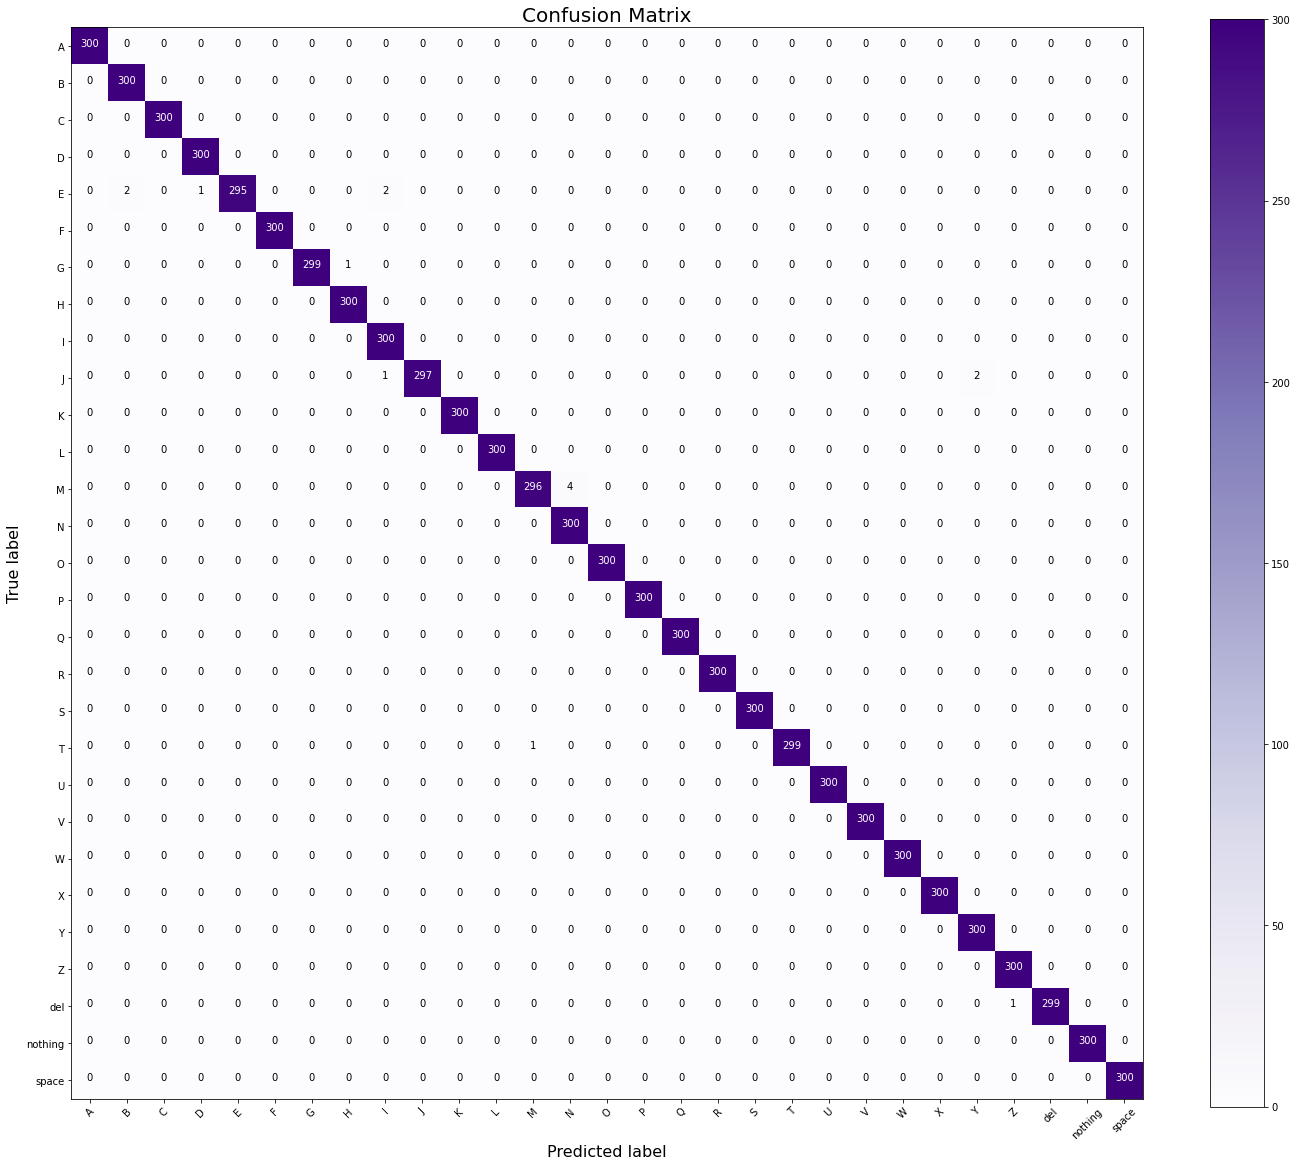

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

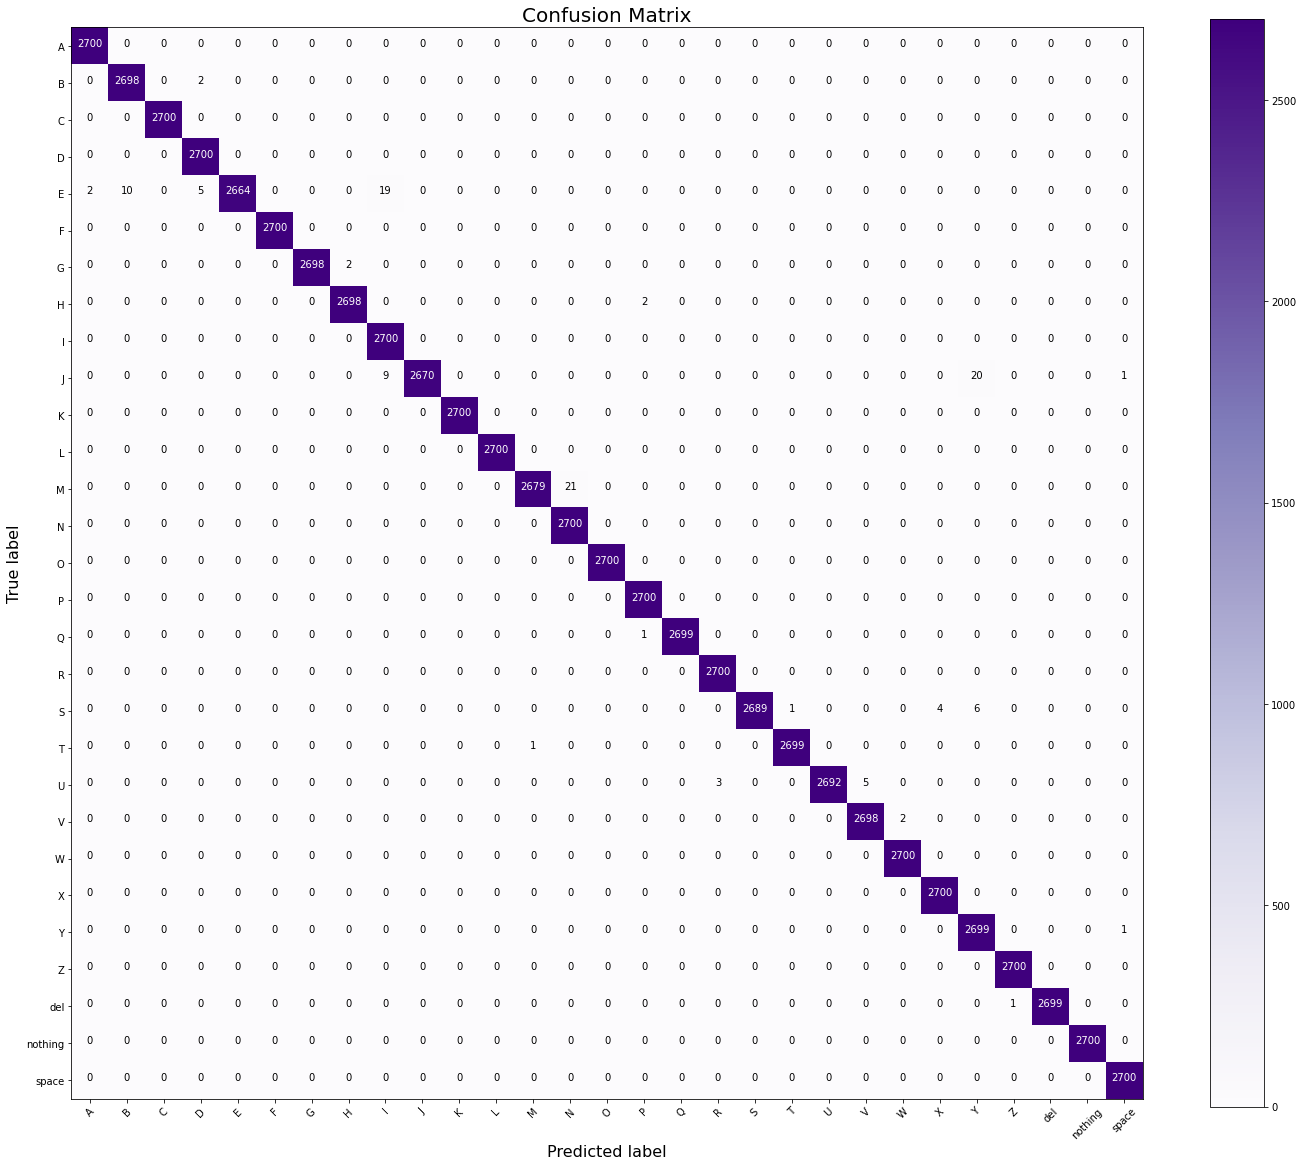

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

y_train_pred = model.predict(X_train, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_train, y_train_pred)

In [25]:
model.save("C://Users/User/Desktop/ASL")

INFO:tensorflow:Assets written to: C://Users/User/Desktop/ASL\assets


In [26]:
from tensorflow import keras
model = keras.models.load_model('C://Users/User/Desktop/ASL')